# ナンバープレートの色による分類

各ナンバープレートを色分析して、代表色を決定する。

ナンバープレート検出時に代表色との近さで、分類を決定する。

In [1]:
import glob

In [2]:
img_paths = glob.glob("*.png")

In [3]:
import cv2

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import math

category2.png 110.25025303643724 137.2295883940621
category1.png 123.06975371120107 184.37862685560054
category0.png 120.27952091767881 131.32607962213226


Text(0, 0.5, 'b_score')

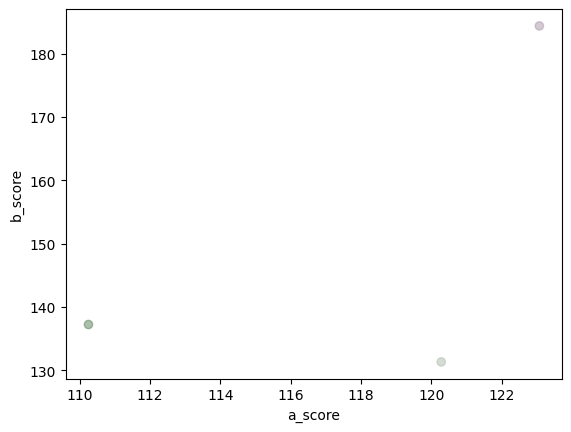

In [7]:
a_score_list = []
b_score_list = []
color_list = []

for img_path in img_paths:
    img = cv2.imread(img_path)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
    width = img.shape[1]
    height = img.shape[0]
    x0 = math.floor(width / 4)
    y0 = math.floor(height / 4)
    x1 = math.floor(width * 3 / 4)
    y1 = math.floor(height * 3 / 4)
    extract_area = img[y0:y1, x0:x1]
    extract_area_lab = img_lab[y0:y1, x0:x1]
    blue, green, red = np.mean(extract_area, axis=(0, 1))
    _, a_score, b_score = np.mean(extract_area_lab, axis=(0, 1))
    print(img_path, a_score, b_score)
    color = [red / 255, green / 255, red / 255, 0.5]
    a_score_list.append(a_score)
    b_score_list.append(b_score)
    color_list.append(color)
    
fig, ax = plt.subplots()
ax.scatter(a_score_list, b_score_list, c=color_list)
ax.set_xlabel("a_score")
ax.set_ylabel("b_score")